<a href="https://colab.research.google.com/github/juwimana/Trading/blob/main/Stock_Purchase_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [553]:
#import packages
import datetime as dt
import pandas as pd

#visualization packages
import seaborn as sns

#!pip install mplfinance
import mplfinance as mpf

#install python package yfinance
#!pip install yfinance
import yfinance as yf

# import stock_info module from yahoo_fin
#!pip install yahoo_fin
from yahoo_fin import stock_info as si

#styling package
from IPython.display import HTML

#currency formatting
import locale 
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [554]:
start_date =dt.datetime(2020,10,1)
end_date = dt.date.today()
stock_data =''

#stock ticker
ticker = 'LTHM'
stock = yf.Ticker(ticker)
p_price = 11.51
shares = 10

In [555]:
#general stock prices
df_prices = yf.download(ticker, 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,9.25,9.39,8.94,9.03,9.03,2656200
2020-10-02,8.62,9.75,8.52,9.56,9.56,4410300
2020-10-05,10.41,11.35,10.37,11.29,11.29,14363200
2020-10-06,12.03,12.18,11.06,11.42,11.42,19792600
2020-10-07,11.68,12.22,11.25,11.97,11.97,8853100


In [556]:
#get stock price historical data
h_stock = stock.history(period='max')
h_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-11,16.250000,16.980000,16.0000,16.969999,11422700,0,0
2018-10-12,17.120001,17.299999,16.2500,16.250000,4222400,0,0
2018-10-15,16.440001,16.440001,15.9100,16.000000,1972500,0,0
2018-10-16,16.200001,16.450001,16.0000,16.049999,1956200,0,0
2018-10-17,16.059999,16.410000,16.0100,16.400000,1759600,0,0
...,...,...,...,...,...,...,...
2020-10-02,8.620000,9.750000,8.5200,9.560000,4410300,0,0
2020-10-05,10.410000,11.350000,10.3700,11.290000,14363200,0,0
2020-10-06,12.030000,12.180000,11.0600,11.420000,19792600,0,0


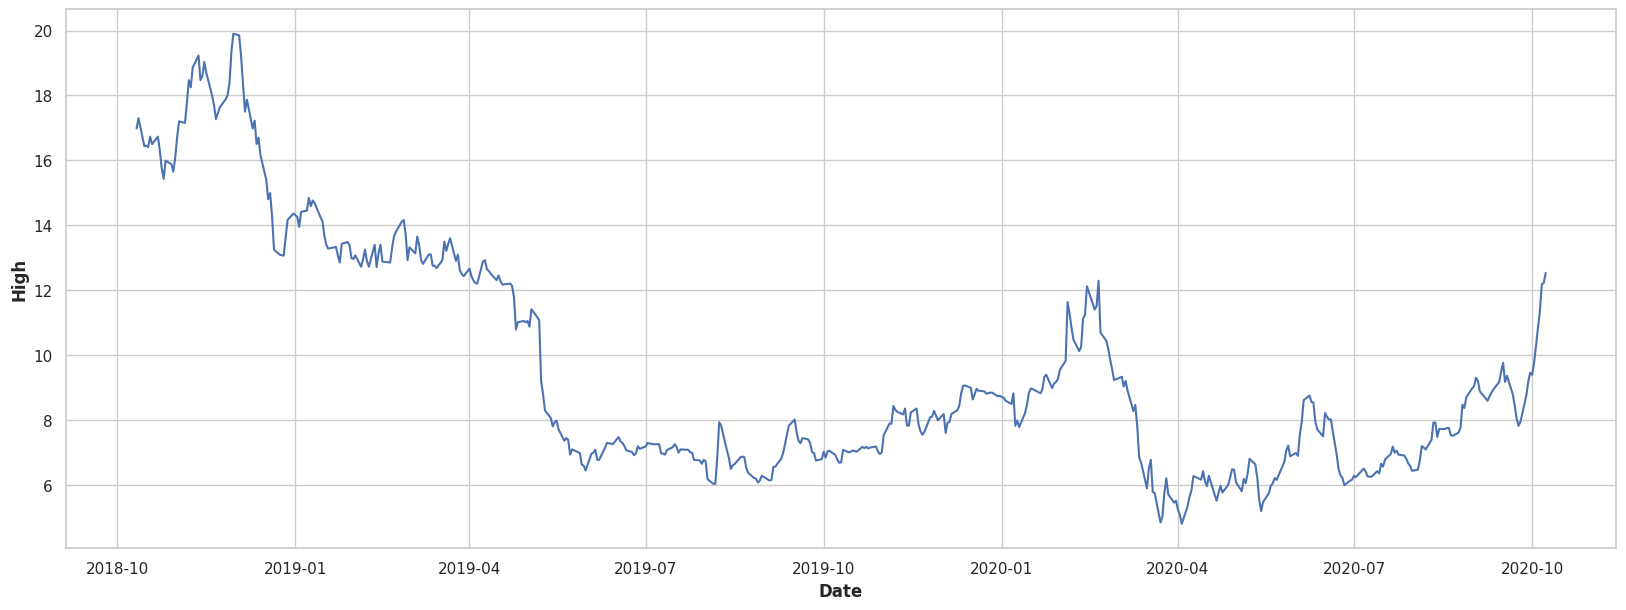

In [557]:
#plot historical data
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="whitegrid")
sns.lineplot(data=h_stock.High, palette='tab10')

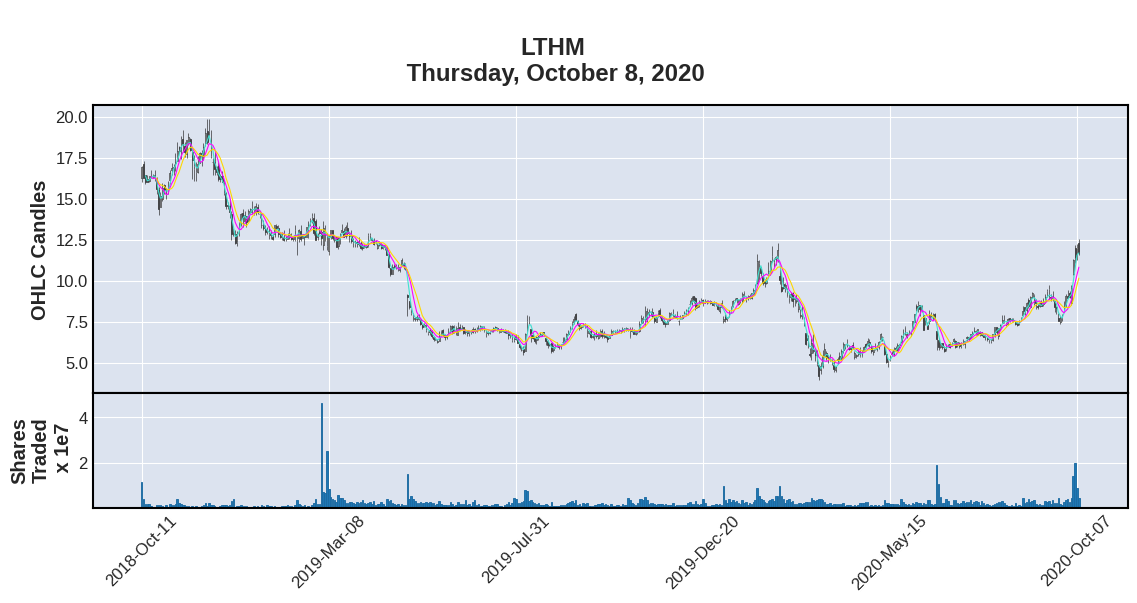

In [558]:
#plot stock historical data using mplfinance package
mpf.plot(h_stock,type='candle',mav=(3,6,9),volume=True, figratio=(25,10), 
         title='\n{}\n {}, {} {}, {}'.format(ticker,end_date.strftime('%A'), end_date.strftime("%B"), end_date.day, end_date.year),
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded'
         )

In [559]:
#incomplete url string
str_summary = 'https://finance.yahoo.com/quote/{}?p={}&.tsrc=fin-srch'
str_stat = 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'
str_analysis = 'https://finance.yahoo.com/quote/{}/analysis?p={}'
str_financials= 'https://finance.yahoo.com/quote/{}/financials?p={}'

#complete website url
url_summary = str_summary.format(ticker,ticker)
url_stat = str_stat.format(ticker,ticker)
url_analysis = str_analysis.format(ticker,ticker)
url_financials = str_financials.format(ticker,ticker)
url_indexes = 'https://finance.yahoo.com/world-indices'

print(url_summary)
print(url_stat)
print(url_analysis)
print(url_financials)
print(url_indexes)

https://finance.yahoo.com/quote/LTHM?p=LTHM&.tsrc=fin-srch
https://finance.yahoo.com/quote/LTHM/key-statistics?p=LTHM
https://finance.yahoo.com/quote/LTHM/analysis?p=LTHM
https://finance.yahoo.com/quote/LTHM/financials?p=LTHM
https://finance.yahoo.com/world-indices


In [560]:
#DataFrame styling
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [561]:
#real-time US major index trend
df_indexes = pd.read_html(url_indexes, header = 0)
name = df_indexes[0].get('Name').to_frame()
d_change  = df_indexes[0].get('Change').to_frame()
p_change = df_indexes[0].get('% Change').to_frame()
last_price = df_indexes[0].get('Last Price').to_frame()
index_df = pd.concat([name, last_price ,d_change, p_change], axis=1, sort=False)
index_df[0:3]

,Name,Last Price,Change,% Change
0,S&P 500,3429.86,10.41,+0.30%
1,Dow 30,28278.94,-24.52,-0.09%
2,Nasdaq,11388.67,24.07,+0.21%


In [562]:
#read ticker financial summary page
df_summary = pd.read_html(url_summary, header = 0)
df_summary

[  Previous Close          11.97
 0           Open          12.28
 1            Bid    11.80 x 800
 2            Ask   11.81 x 1300
 3    Day's Range  11.59 - 12.53
 4  52 Week Range   3.95 - 12.53
 5         Volume        4558745
 6    Avg. Volume        2901223,                  Market Cap        1.711B
 0         Beta (5Y Monthly)           NaN
 1            PE Ratio (TTM)        109.35
 2                 EPS (TTM)          0.11
 3             Earnings Date  Aug 06, 2020
 4  Forward Dividend & Yield     N/A (N/A)
 5          Ex-Dividend Date           NaN
 6             1y Target Est          7.90]

In [563]:
summary_2 = df_summary[0]
summary_2

,Previous Close,11.97
0,Open,12.28
1,Bid,11.80 x 800
2,Ask,11.81 x 1300
3,Day's Range,11.59 - 12.53
4,52 Week Range,3.95 - 12.53
5,Volume,4558745
6,Avg. Volume,2901223


In [564]:
summary_1 = df_summary[1]
summary_1

,Market Cap,1.711B
0,Beta (5Y Monthly),NaN
1,PE Ratio (TTM),109.35
2,EPS (TTM),0.11
3,Earnings Date,"Aug 06, 2020"
4,Forward Dividend & Yield,N/A (N/A)
5,Ex-Dividend Date,NaN
6,1y Target Est,7.90


In [565]:
#read ticker financial statistics page
df_stat = pd.read_html(url_stat, header =0)
df_stat

[                    Unnamed: 0  ... 9/30/2019
 0      Market Cap (intraday) 5  ...   976.61M
 1           Enterprise Value 3  ...     1.03B
 2                 Trailing P/E  ...     11.06
 3                Forward P/E 1  ...      9.04
 4  PEG Ratio (5 yr expected) 1  ...      0.95
 5            Price/Sales (ttm)  ...      2.20
 6             Price/Book (mrq)  ...      1.87
 7   Enterprise Value/Revenue 3  ...     10.56
 8    Enterprise Value/EBITDA 6  ...     44.87
 
 [9 rows x 6 columns],           Beta (5Y Monthly)     N/A
 0          52-Week Change 3  81.91%
 1   S&P500 52-Week Change 3  16.38%
 2            52 Week High 3   12.53
 3             52 Week Low 3    3.95
 4   50-Day Moving Average 3    8.73
 5  200-Day Moving Average 3    6.96,                               Avg Vol (3 month) 3     2.9M
 0                              Avg Vol (10 day) 3    7.52M
 1                            Shares Outstanding 5  146.25M
 2                                           Float  145.03M
 3     

In [566]:
len(df_stat)

10

In [567]:
stat_0 = df_stat[0]
stat_0

,Unnamed: 0,As of Date: 10/1/2020Current,6/30/2020,3/31/2020,12/31/2019,9/30/2019
0,Market Cap (intraday) 5,1.31B,900.91M,767.50M,1.25B,976.61M
1,Enterprise Value 3,1.52B,1.12B,922.80M,1.33B,1.03B
2,Trailing P/E,81.55,29.33,15.44,16.36,11.06
3,Forward P/E 1,43.48,58.82,18.42,13.35,9.04
4,PEG Ratio (5 yr expected) 1,2.25,3.04,1.25,1.25,0.95
5,Price/Sales (ttm),4.24,2.51,1.98,2.90,2.20
6,Price/Book (mrq),2.30,1.67,1.41,2.30,1.87
7,Enterprise Value/Revenue 3,4.91,17.20,13.47,17.00,10.56
8,Enterprise Value/EBITDA 6,30.71,237.51,109.86,99.44,44.87


In [568]:
stat_1 = df_stat[1]
stat_1

,Beta (5Y Monthly),N/A
0,52-Week Change 3,81.91%
1,S&P500 52-Week Change 3,16.38%
2,52 Week High 3,12.53
3,52 Week Low 3,3.95
4,50-Day Moving Average 3,8.73
5,200-Day Moving Average 3,6.96


In [569]:
stat_5 = df_stat[5]
stat_5

,Profit Margin,5.07%
0,Operating Margin (ttm),8.50%


In [570]:
stat_6 = df_stat[6]
stat_6

,Return on Assets (ttm),2.06%
0,Return on Equity (ttm),2.87%


In [571]:
stat_8 = df_stat[8]
stat_8

,Total Cash (mrq),17.2M
0,Total Cash Per Share (mrq),0.12
1,Total Debt (mrq),225.4M
2,Total Debt/Equity (mrq),39.46
3,Current Ratio (mrq),3.48
4,Book Value Per Share (mrq),3.91


In [572]:
#read ticker financial statistics page
df_analysis = pd.read_html(url_analysis, header =0)
df_analysis

[  Earnings Estimate  ...  Next Year (2021)
 0   No. of Analysts  ...             14.00
 1     Avg. Estimate  ...              0.24
 2      Low Estimate  ...              0.12
 3     High Estimate  ...              0.55
 4      Year Ago EPS  ...              0.07
 
 [5 rows x 5 columns],           Revenue Estimate  ... Next Year (2021)
 0          No. of Analysts  ...               12
 1            Avg. Estimate  ...          375.83M
 2             Low Estimate  ...             302M
 3            High Estimate  ...             501M
 4           Year Ago Sales  ...          303.11M
 5  Sales Growth (year/est)  ...           24.00%
 
 [6 rows x 5 columns],   Earnings History 9/29/2019 12/30/2019 3/30/2020 6/29/2020
 0         EPS Est.      0.13       0.05      0.04      0.02
 1       EPS Actual      0.12       0.05      0.02         0
 2       Difference     -0.01          0     -0.02     -0.02
 3       Surprise %    -7.70%      0.00%   -50.00%  -100.00%,           EPS Trend  ...  Next Y

In [573]:
analysis_5 = df_analysis[5]
analysis_5

,Growth Estimates,LTHM,Industry,Sector(s),S&P 500
0,Current Qtr.,-91.70%,NaN,NaN,NaN
1,Next Qtr.,-40.00%,NaN,NaN,NaN
2,Current Year,-83.30%,NaN,NaN,NaN
3,Next Year,242.90%,NaN,NaN,NaN
4,Next 5 Years (per annum),6.15%,NaN,NaN,NaN
5,Past 5 Years (per annum),NaN,NaN,NaN,NaN


*   [Operating margin](https://www.investopedia.com/terms/o/operatingmargin.asp) is the profit a company makes on a dollar of sales after paying for variable costs but before paying any interest or taxes
*   [EPS](https://www.investopedia.com/terms/e/eps.asp) indicates how much money a company makes for each share of its stock
*   [Beta](https://www.investopedia.com/terms/b/beta.asp) is a measure of the volatility—or systematic risk—of a security or portfolio compared to the market as a whole
*   [Enterprise Value/EBITDA](https://www.investopedia.com/ask/answers/072715/what-considered-healthy-evebitda.asp#:~:text=The%20enterprise%2Dvalue%2Dto%2D,10%20are%20seen%20as%20healthy.) compares the value of a company—debt included—to the company’s cash earnings less non-cash expenses
*   [Return on equity (ROE)](https://www.investopedia.com/terms/r/returnonequity.asp) measures how effectively management is using a company’s assets to create profits
*   [Debt-to-Equity Ratio (D/E)](https://www.investopedia.com/terms/d/debtequityratio.asp) is a measure of the degree to which a company is financing its operations through debt versus wholly-owned funds

Note: GE stands for Growth Estimates per annum. For example, GE Next Year means growth estimates for next year.



In [574]:
#create stock key metrics DataFrame
stock_metrics= {
    'Company': stock.info.get('shortName'),
    'Ticker': ticker,
    'Sector': stock.info.get('sector'),
    '52 Week Low': stat_1.loc[3][1],
    '52 Week High': stat_1.loc[2][1],
    'Price': round(si.get_live_price(ticker),2),
    'Purchase Price': p_price,
    'Shares Owned': shares,
    'Capital Gain ($)': (stock_metrics['Price'] - stock_metrics['Purchase Price'])*stock_metrics['Shares Owned'],
    'Capital Gain (%)': "{:.2%}".format(stock_metrics['Capital Gain ($)']/(stock_metrics['Purchase Price']*stock_metrics['Shares Owned'])),
    'EPS' : summary_1.loc[2][1],
    'Beta' : stock.info.get('beta'),
    'Enterprise Value/EBITDA': stat_0.loc[8][1],
    'Operating Margin': stat_5.loc[0][1],
    'ROE':stat_6.loc[0][1],
    'Debt-to-Equity': stat_8.loc[2][1],
    'GE Next Year': analysis_5.loc[3][1],
    'GE Next 5 Years': analysis_5.loc[4][1],
    'GE Past 5 Years': analysis_5.loc[5][1]
    }
stock_df = pd.DataFrame(data = stock_metrics, index = [0])
stock_df

,Company,Ticker,Sector,52 Week Low,52 Week High,Price,Purchase Price,Shares Owned,Capital Gain ($),Capital Gain (%),EPS,Beta,Enterprise Value/EBITDA,Operating Margin,ROE,Debt-to-Equity,GE Next Year,GE Next 5 Years,GE Past 5 Years
0,Livent Corporation,LTHM,Basic Materials,3.95,12.53,11.68,11.51,10,1.9,1.65%,0.11,None,30.71,8.50%,2.87%,39.46,242.90%,6.15%,NaN
